In [1]:
import mne as mne

In [21]:
data1 = mne.io.read_raw_eeglab('/home/dhz/bci-data/ds003478-download/sub-001/eeg/sub-001_task-Rest_run-01_eeg.set')

Reading /home/dhz/bci-data/ds003478-download/sub-001/eeg/sub-001_task-Rest_run-01_eeg.fdt


In [22]:
data1

<RawEEGLAB | sub-001_task-Rest_run-01_eeg.fdt, 66 x 250734 (501.5 s), ~92 kB, data not loaded>

Using matplotlib as 2D backend.


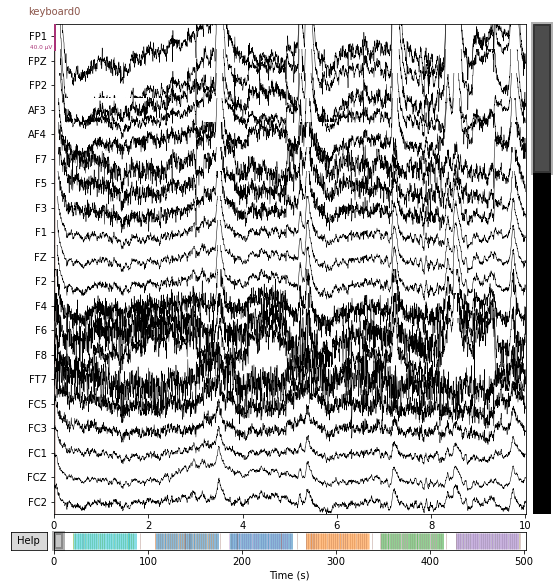

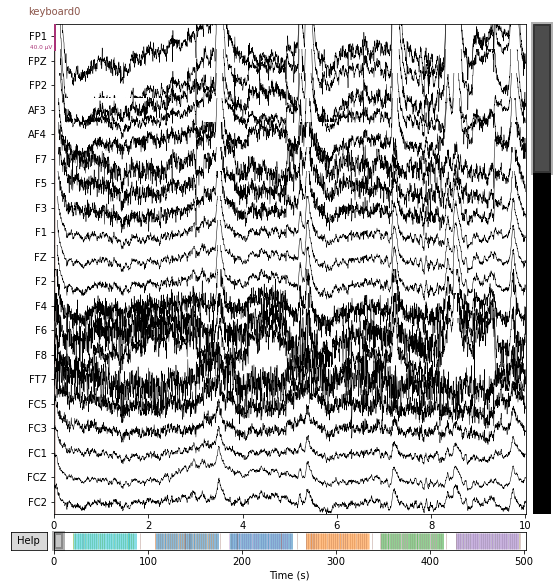

In [4]:
data1.plot()

In [5]:
data1.describe()

<RawEEGLAB | sub-001_task-Rest_run-01_eeg.fdt, 66 x 250734 (501.5 s), ~92 kB, data not loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  FP1   EEG   µV    -318407.97     -29.88      -8.13      12.68  315920.41
 1  FPZ   EEG   µV    -318407.97     -25.54      -4.98      12.91  313432.84
 2  FP2   EEG   µV    -318407.97     -36.16     -16.96       1.41  315920.41
 3  AF3   EEG   µV    -306012.69     -25.90     -15.71      -5.53  305927.62
 4  AF4   EEG   µV    -300034.09     -24.15     -13.86      -3.17  301955.97
 5  F7    EEG   µV    -318407.97     -32.83     -20.43      -7.96  315920.41
 6  F5    EEG   µV    -318407.97     -37.38     -27.60     -17.73  313432.84
 7  F3    EEG   µV    -318407.97     -22.24     -14.10      -6.13  315920.41
 8  F1    EEG   µV    -318407.97     -20.43     -13.99      -7.30  313432.84
 9  FZ    EEG   µV    -318407.97     -21.76     -14.64      -7.69  316533.66
10  F2    EEG   µV    -318407.97     -20.20     -13.62     

In [6]:
data2 = mne.io.read_raw_eeglab('/home/dhz/bci-data/ds003478-download/sub-002/eeg/sub-002_task-Rest_run-01_eeg.set')

Reading /home/dhz/bci-data/ds003478-download/sub-002/eeg/sub-002_task-Rest_run-01_eeg.fdt


In [7]:
data2

<RawEEGLAB | sub-002_task-Rest_run-01_eeg.fdt, 66 x 244934 (489.9 s), ~92 kB, data not loaded>

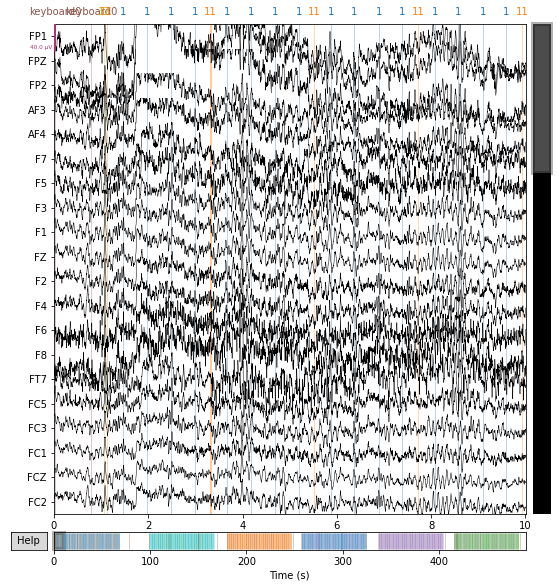

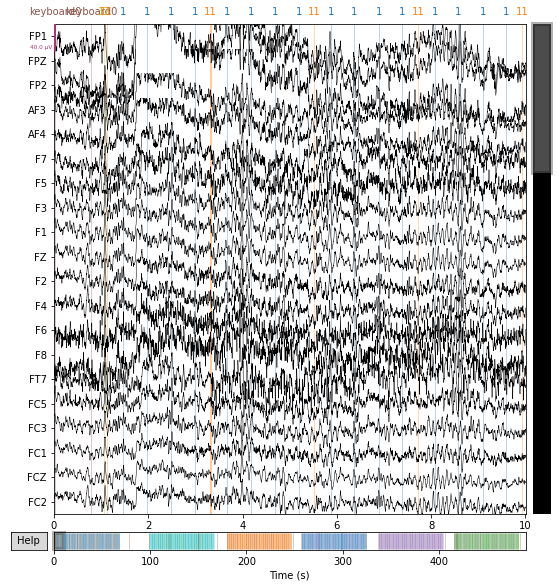

In [8]:
data2.plot()

In [9]:
data1.info['sfreq']

500.0

In [10]:
data1.info

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 66 EEG
 custom_ref_applied: False
 dig: 69 items (3 Cardinal, 66 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 500.0 Hz
>

In [11]:
signals, times = data1.get_data(return_times = True)
print(signals.shape)
print(times.shape)

(66, 250734)
(250734,)


In [23]:
import pandas as pd

dataFrame = pd.read_csv('/home/dhz/bci-data/ds003478-download/sub-001/eeg/sub-001_task-Rest_run-01_events.tsv', sep='\t', header=0)

dataFrame

onset  duration  sample                trial_type  response_time  \
0      0.016       NaN     NaN                    STATUS            NaN   
1     20.648       NaN     NaN          Start and Finish            NaN   
2     20.698       NaN     NaN  Eyes Open: Every 2000 ms            NaN   
3     21.048       NaN     NaN   Eyes Open: Every 500 ms            NaN   
4     21.548       NaN     NaN   Eyes Open: Every 500 ms            NaN   
..       ...       ...     ...                       ...            ...   
932  493.282       NaN     NaN   Eyes Open: Every 500 ms            NaN   
933  493.798       NaN     NaN   Eyes Open: Every 500 ms            NaN   
934  494.300       NaN     NaN   Eyes Open: Every 500 ms            NaN   
935  494.600       NaN     NaN          Start and Finish            NaN   
936  495.664       NaN     NaN                    STATUS            NaN   

     stim_file      value  
0          NaN  keyboard0  
1          NaN         17  
2          NaN         12  
3          NaN          2  
4          NaN          2  
..         ...        ...  
932        NaN          6  
933        NaN          6  
934        NaN          6  
935        NaN         17  
936        NaN  keyboard0  

[937 rows x 7 columns]

In [24]:
col = dataFrame.columns

In [25]:
col = col[[1, 2, 4, 5]]

In [26]:
col

Index(['duration', 'sample', 'response_time', 'stim_file'], dtype='object')

In [27]:
dataFrame = dataFrame.drop(col, axis=1)

In [28]:
dataFrame

onset                trial_type      value
0      0.016                    STATUS  keyboard0
1     20.648          Start and Finish         17
2     20.698  Eyes Open: Every 2000 ms         12
3     21.048   Eyes Open: Every 500 ms          2
4     21.548   Eyes Open: Every 500 ms          2
..       ...                       ...        ...
932  493.282   Eyes Open: Every 500 ms          6
933  493.798   Eyes Open: Every 500 ms          6
934  494.300   Eyes Open: Every 500 ms          6
935  494.600          Start and Finish         17
936  495.664                    STATUS  keyboard0

[937 rows x 3 columns]

In [29]:
print(dataFrame)

       onset                trial_type      value
0      0.016                    STATUS  keyboard0
1     20.648          Start and Finish         17
2     20.698  Eyes Open: Every 2000 ms         12
3     21.048   Eyes Open: Every 500 ms          2
4     21.548   Eyes Open: Every 500 ms          2
..       ...                       ...        ...
932  493.282   Eyes Open: Every 500 ms          6
933  493.798   Eyes Open: Every 500 ms          6
934  494.300   Eyes Open: Every 500 ms          6
935  494.600          Start and Finish         17
936  495.664                    STATUS  keyboard0

[937 rows x 3 columns]


In [31]:
dataFrame['onset']

0.016

In [1]:
import pandas as pd

dataFrame = pd.read_csv('/home/dhz/bci-data/ds003478-download/sub-001/eeg/sub-001_task-Rest_run-01_events.tsv', sep='\t', header=0)

dataFrame

onset  duration  sample                trial_type  response_time  \
0      0.016       NaN     NaN                    STATUS            NaN   
1     20.648       NaN     NaN          Start and Finish            NaN   
2     20.698       NaN     NaN  Eyes Open: Every 2000 ms            NaN   
3     21.048       NaN     NaN   Eyes Open: Every 500 ms            NaN   
4     21.548       NaN     NaN   Eyes Open: Every 500 ms            NaN   
..       ...       ...     ...                       ...            ...   
932  493.282       NaN     NaN   Eyes Open: Every 500 ms            NaN   
933  493.798       NaN     NaN   Eyes Open: Every 500 ms            NaN   
934  494.300       NaN     NaN   Eyes Open: Every 500 ms            NaN   
935  494.600       NaN     NaN          Start and Finish            NaN   
936  495.664       NaN     NaN                    STATUS            NaN   

     stim_file      value  
0          NaN  keyboard0  
1          NaN         17  
2          NaN         12  
3          NaN          2  
4          NaN          2  
..         ...        ...  
932        NaN          6  
933        NaN          6  
934        NaN          6  
935        NaN         17  
936        NaN  keyboard0  

[937 rows x 7 columns]

In [2]:
dataFrame['onset']

0        0.016
1       20.648
2       20.698
3       21.048
4       21.548
        ...   
932    493.282
933    493.798
934    494.300
935    494.600
936    495.664
Name: onset, Length: 937, dtype: float64

In [1]:
import pandas as pd

events = pd.read_csv('/home/dhz/bci-data/ds003478-download/sub-001/eeg/sub-001_task-Rest_run-01_events.tsv', sep='\t', header=0)

events

onset  duration  sample                trial_type  response_time  \
0      0.016       NaN     NaN                    STATUS            NaN   
1     20.648       NaN     NaN          Start and Finish            NaN   
2     20.698       NaN     NaN  Eyes Open: Every 2000 ms            NaN   
3     21.048       NaN     NaN   Eyes Open: Every 500 ms            NaN   
4     21.548       NaN     NaN   Eyes Open: Every 500 ms            NaN   
..       ...       ...     ...                       ...            ...   
932  493.282       NaN     NaN   Eyes Open: Every 500 ms            NaN   
933  493.798       NaN     NaN   Eyes Open: Every 500 ms            NaN   
934  494.300       NaN     NaN   Eyes Open: Every 500 ms            NaN   
935  494.600       NaN     NaN          Start and Finish            NaN   
936  495.664       NaN     NaN                    STATUS            NaN   

     stim_file      value  
0          NaN  keyboard0  
1          NaN         17  
2          NaN         12  
3          NaN          2  
4          NaN          2  
..         ...        ...  
932        NaN          6  
933        NaN          6  
934        NaN          6  
935        NaN         17  
936        NaN  keyboard0  

[937 rows x 7 columns]

In [2]:
col = events.columns
col = col[[1, 2, 4, 5]]
events = events.drop(col, axis=1)

In [3]:
events

onset                trial_type      value
0      0.016                    STATUS  keyboard0
1     20.648          Start and Finish         17
2     20.698  Eyes Open: Every 2000 ms         12
3     21.048   Eyes Open: Every 500 ms          2
4     21.548   Eyes Open: Every 500 ms          2
..       ...                       ...        ...
932  493.282   Eyes Open: Every 500 ms          6
933  493.798   Eyes Open: Every 500 ms          6
934  494.300   Eyes Open: Every 500 ms          6
935  494.600          Start and Finish         17
936  495.664                    STATUS  keyboard0

[937 rows x 3 columns]

In [4]:
import mne as mne
data1 = mne.io.read_raw_eeglab('/home/dhz/bci-data/ds003478-download/sub-001/eeg/sub-001_task-Rest_run-01_eeg.set')

Reading /home/dhz/bci-data/ds003478-download/sub-001/eeg/sub-001_task-Rest_run-01_eeg.fdt


In [5]:
raw1 = data1.copy().crop(tmin=86.4320000000, tmax=108.8380000000)

Using matplotlib as 2D backend.


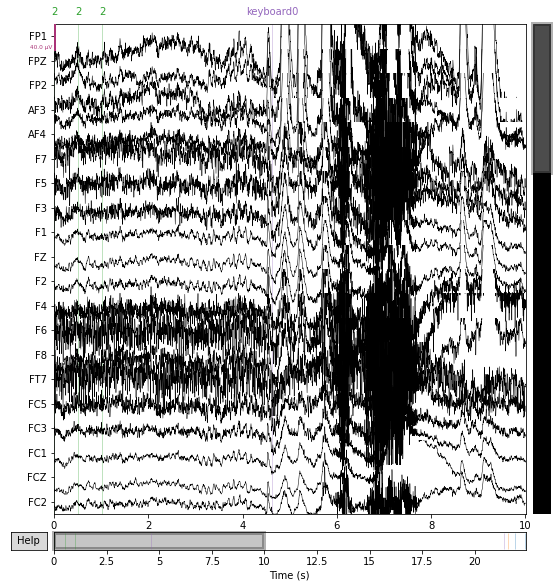

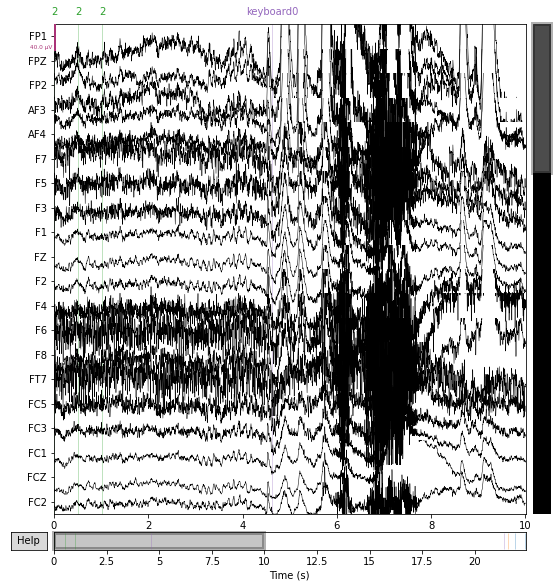

In [6]:
raw1.plot()

In [7]:
raw2 = data1.copy().crop(tmin=91.0620000000, tmax=107.9880000000)

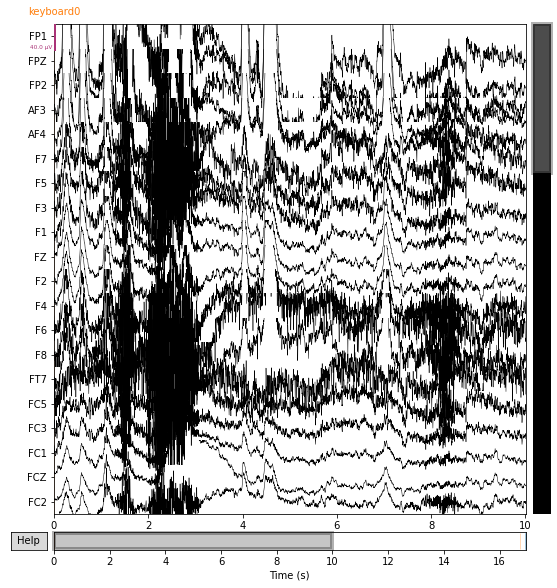

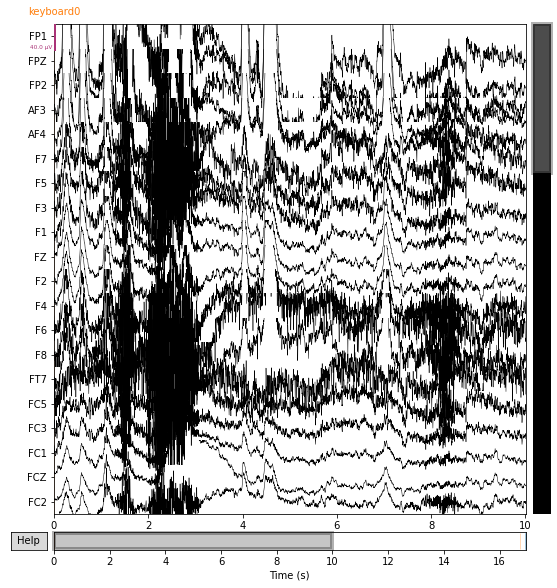

In [8]:
raw2.plot()

In [11]:
raw2 = data1.copy().crop(tmin=107.9880000000, tmax=140.1860000000)

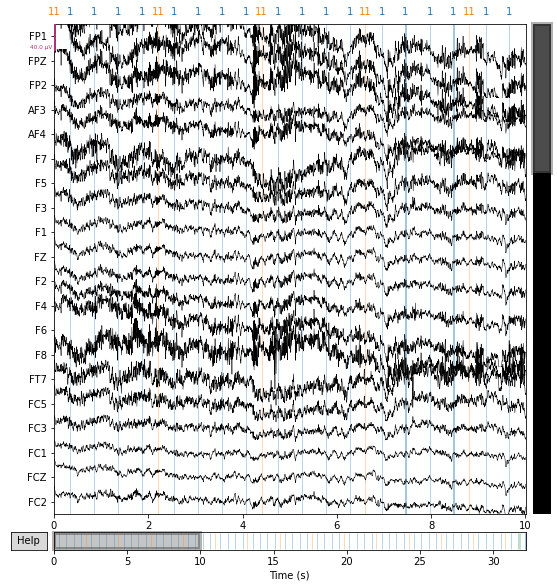

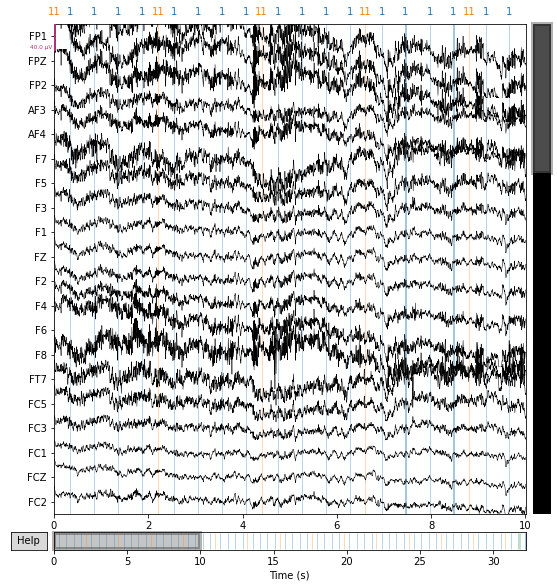

In [12]:
raw2.plot()

In [13]:
raw2.ch_names

['FP1',
 'FPZ',
 'FP2',
 'AF3',
 'AF4',
 'F7',
 'F5',
 'F3',
 'F1',
 'FZ',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCZ',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'T7',
 'C5',
 'C3',
 'C1',
 'CZ',
 'C2',
 'C4',
 'C6',
 'T8',
 'M1',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPZ',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'M2',
 'P7',
 'P5',
 'P3',
 'P1',
 'PZ',
 'P2',
 'P4',
 'P6',
 'P8',
 'PO7',
 'PO5',
 'PO3',
 'POZ',
 'PO4',
 'PO6',
 'PO8',
 'CB1',
 'O1',
 'OZ',
 'O2',
 'CB2',
 'HEOG',
 'VEOG']

In [14]:
for i in raw1:
    print(i)

(array([[5.30644464e-06, 3.21672344e-06, 3.07542181e-06, ...,
        5.74883842e-05, 6.23305969e-05, 6.48660202e-05]]), array([0.0000e+00, 2.0000e-03, 4.0000e-03, ..., 2.2402e+01, 2.2404e+01,
       2.2406e+01]))
(array([[1.09334497e-05, 9.58715534e-06, 1.12442236e-05, ...,
        4.08607635e-05, 4.68805389e-05, 4.97728462e-05]]), array([0.0000e+00, 2.0000e-03, 4.0000e-03, ..., 2.2402e+01, 2.2404e+01,
       2.2406e+01]))
(array([[-9.92832565e-06, -1.30762510e-05, -1.40618038e-05, ...,
         4.94164047e-05,  5.13342781e-05,  5.28490067e-05]]), array([0.0000e+00, 2.0000e-03, 4.0000e-03, ..., 2.2402e+01, 2.2404e+01,
       2.2406e+01]))
(array([[-1.66615753e-05, -1.80910473e-05, -1.72711143e-05, ...,
         1.80519047e-05,  2.19506721e-05,  2.40077724e-05]]), array([0.0000e+00, 2.0000e-03, 4.0000e-03, ..., 2.2402e+01, 2.2404e+01,
       2.2406e+01]))
(array([[-2.20190239e-05, -1.69422493e-05, -7.21675873e-06, ...,
         4.21805191e-05,  4.41937332e-05,  4.65135689e-05]]), array

ValueError: All picks must be < n_channels (66), got 66

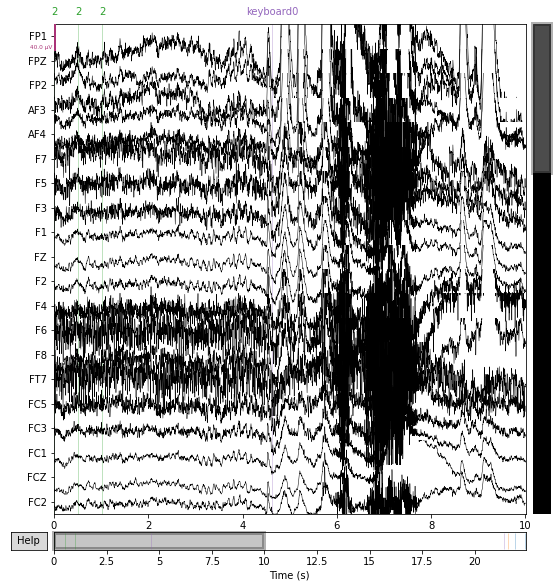

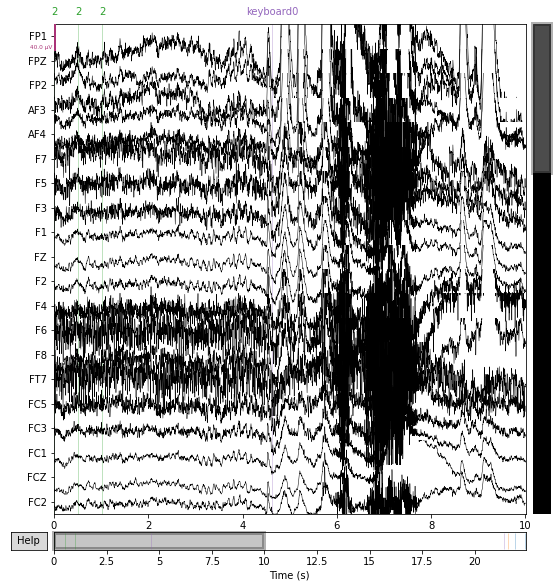

In [15]:
raw1.plot()

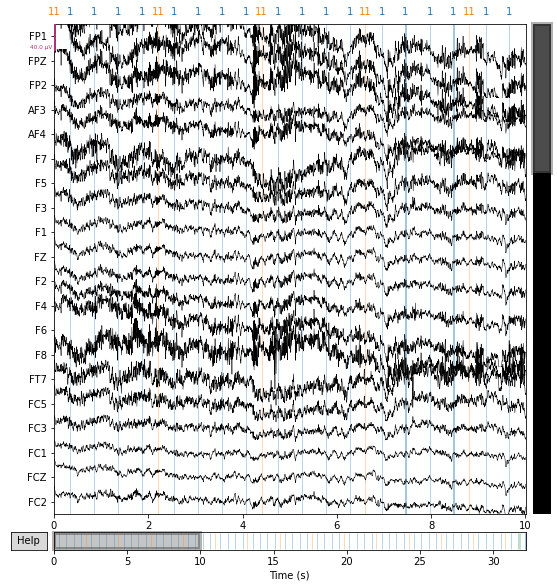

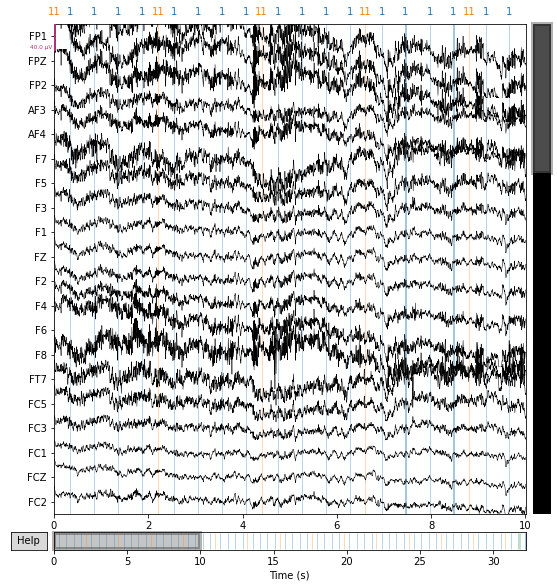

In [16]:
raw2.plot()

In [19]:
seg = raw2.annotations

In [35]:
seg = data1.annotations
seg[0]

OrderedDict([('onset', 0.016),
             ('duration', 0.0),
             ('description', 'keyboard0'),
             ('orig_time', None)])

In [36]:
for i in seg:
    print(i['description'])

keyboard0
17
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
keyboard0
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
12
2
2
2
2
2
2
keyboard0
keyboard0
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
keyboard0
keyboard0
1
1
11
1
1
1
1
11
1
keyboard0
1
keyboard0
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
11
1
1
1
1
1
1
keyboard0
13
3
3
keyboard0
3
3
13
3
3
3
3
13
3
3
3
3
13
3
3
3
keyboard0
keyboard0
3
13
3
3
3
3
13
3
3
3
3
13
3
3
3
3
13
3
3
3
3
13
3
3
3
3
13
3
3
3
3
13
3
3
3
3
13
3
3
3
3
13
3
3
3
3
13
3
3
3
3
13
3
3
3
3
13
3
3
3
3
13
3
3
3
3
13
3
3
3
3
13
3
3
3
3


In [37]:
dataframe = seg.to_data_frame()

In [38]:
dataframe

onset  duration description
0   1970-01-01 00:00:00.016       0.0   keyboard0
1   1970-01-01 00:00:20.648       0.0          17
2   1970-01-01 00:00:20.698       0.0          12
3   1970-01-01 00:00:21.048       0.0           2
4   1970-01-01 00:00:21.548       0.0           2
..                      ...       ...         ...
932 1970-01-01 00:08:13.282       0.0           6
933 1970-01-01 00:08:13.798       0.0           6
934 1970-01-01 00:08:14.300       0.0           6
935 1970-01-01 00:08:14.600       0.0          17
936 1970-01-01 00:08:15.664       0.0   keyboard0

[937 rows x 3 columns]

In [39]:
newframe = dataframe.groupby(dataframe.description)

In [41]:
newframe.get_group('2')

onset  duration description
3   1970-01-01 00:00:21.048       0.0           2
4   1970-01-01 00:00:21.548       0.0           2
5   1970-01-01 00:00:22.066       0.0           2
6   1970-01-01 00:00:22.566       0.0           2
8   1970-01-01 00:00:23.250       0.0           2
..                      ...       ...         ...
150 1970-01-01 00:01:25.414       0.0           2
151 1970-01-01 00:01:25.932       0.0           2
152 1970-01-01 00:01:26.432       0.0           2
153 1970-01-01 00:01:26.948       0.0           2
154 1970-01-01 00:01:27.450       0.0           2

[122 rows x 3 columns]

In [42]:
temp = newframe.get_group('2')

In [45]:
temp.tail(1)

onset  duration description
154 1970-01-01 00:01:27.450       0.0           2

In [46]:
temp.head(1)

onset  duration description
3 1970-01-01 00:00:21.048       0.0           2

In [61]:
des = temp.tail(1)

In [62]:
des

onset  duration description
154 1970-01-01 00:01:27.450       0.0           2

In [69]:
des.index
seg[des.index[0]]['onset']

87.45

In [67]:
from datetime import datetime
eves = ['1', '2', '3', '4', '5', '6']

In [74]:
for i in eves:
    temp = newframe.get_group(i)
    head = temp.head(1).index[0]
    tail = temp.tail(1).index[0]
    start = seg[head]['onset']
    end = seg[tail]['onset']
    print(f'start: {start}, tail: {end}')

start: 108.338, tail: 174.74
start: 21.048, tail: 87.45
start: 187.018, tail: 253.42
start: 268.468, tail: 334.87
start: 347.65, tail: 414.05
start: 427.898, tail: 494.3


In [1]:
'''

Start of the real python file which is used to deal with raw data

'''
import mne as mne
import numpy as np

data = mne.io.read_raw_eeglab('/home/dhz/bci-data/ds003478-download/sub-004/eeg/sub-004_task-Rest_run-01_eeg.set')
signals, times = data.get_data(return_times = True)

Reading /home/dhz/bci-data/ds003478-download/sub-004/eeg/sub-004_task-Rest_run-01_eeg.fdt


In [2]:
seg = data.annotations

In [3]:
dataframe = seg.to_data_frame()

In [4]:
newframe = dataframe.groupby(dataframe.description)

In [5]:
eves = ['1', '2', '3', '4', '5', '6']
signals = []

for i in eves:
    temp = newframe.get_group(i)
    head = temp.head(1).index[0]
    start = seg[head]['onset']
    signal = data.copy().crop(tmin=start, tmax=start + 1024 * 16 * 0.002 - 0.002)
    signal = signal.get_data(return_times = False)
    
    signals.append(signal)

signals = np.array(signals)

In [6]:
print(f'events: {len(signals)}, signal data as following:')
for i in signals:
    print(f'shape: {i.shape}, signal detail:')
    print(i)

events: 6, signal data as following:
shape: (66, 16384), signal detail:
[[ 2.36687820e-04  2.43408768e-04  2.47533493e-04 ... -1.54419031e-05
  -1.59424639e-05 -1.82207851e-05]
 [ 2.34152115e-04  2.37481216e-04  2.39193893e-04 ... -3.08866234e-05
  -3.32417488e-05 -3.51769714e-05]
 [ 2.27504852e-04  2.32913010e-04  2.34934525e-04 ... -6.75396271e-05
  -6.81743698e-05 -6.84093781e-05]
 ...
 [-8.47825699e-05 -9.25895920e-05 -9.70593491e-05 ... -4.60190887e-05
  -4.75382652e-05 -4.90994034e-05]
 [-5.11702637e-04 -5.13952454e-04 -5.12215210e-04 ... -2.25226974e-05
  -2.51246929e-05 -2.99029980e-05]
 [-6.37852745e-05 -6.33853912e-05 -6.71179428e-05 ...  1.43452515e-04
   1.41890198e-04  1.38367142e-04]]
shape: (66, 16384), signal detail:
[[ 1.04604673e-06 -3.05570197e-06 -2.59739852e-06 ...  2.18639326e-06
   6.20659351e-06  1.04119825e-05]
 [-1.74964848e-05 -1.76566162e-05 -1.62538319e-05 ... -7.50054789e-06
  -6.20021772e-06 -3.51504326e-06]
 [-5.13566666e-05 -5.14502258e-05 -5.08003578e-

In [9]:
results = []

for eve in signals:
    results.append(eve.reshape((66, 128, 128)))

ValueError: cannot reshape array of size 1097728 into shape (66,128,128)

In [8]:
results = np.array(results)

print(f'events: {len(signals)}, signal data as following:')
for i in results:
    print(f'shape: {i.shape}, signal detail:')
    print(i)

events: 6, signal data as following:
shape: (66, 128, 128), signal detail:
[[[ 5.95351067e-05  6.15245972e-05  6.23744850e-05 ...  3.40876312e-05
    3.51059494e-05  3.69740067e-05]
  [ 3.98185730e-05  4.50906181e-05  4.98106537e-05 ...  6.24960632e-05
    6.76463776e-05  6.64728241e-05]
  [ 6.54451599e-05  6.66789169e-05  6.81046829e-05 ...  5.15732918e-05
    4.87078209e-05  5.11972771e-05]
  ...
  [ 9.33035088e-06  7.53361225e-06  6.08338070e-06 ... -1.13047180e-05
   -8.31751728e-06 -6.50461674e-06]
  [-6.45791149e-06 -7.12364483e-06 -9.15806103e-06 ... -1.13921976e-05
   -1.38821001e-05 -1.47248678e-05]
  [-1.41452799e-05 -1.13220654e-05 -7.91199780e-06 ...  4.25342894e-06
    9.80807781e-06  1.23741913e-05]]

 [[ 6.60216370e-05  6.50664749e-05  6.51846466e-05 ...  2.40095520e-05
    2.35727482e-05  2.45587444e-05]
  [ 2.64558640e-05  2.92209549e-05  3.24207764e-05 ...  5.18131905e-05
    5.60294037e-05  5.40713501e-05]
  [ 4.95339813e-05  4.85416107e-05  5.28952675e-05 ...  3.704

In [4]:
from data import DataExtract
import pandas as pd

dataset = DataExtract(10).extract()

Reading /home/dhz/bci-data/ds003478-download/sub-001/eeg/sub-001_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-002/eeg/sub-002_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-003/eeg/sub-003_task-Rest_run-01_eeg.fdt


/home/dhz/experiment-BCI/data.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(file_dir)


Reading /home/dhz/bci-data/ds003478-download/sub-004/eeg/sub-004_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-005/eeg/sub-005_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-006/eeg/sub-006_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-007/eeg/sub-007_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-008/eeg/sub-008_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-009/eeg/sub-009_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-010/eeg/sub-010_task-Rest_run-01_eeg.fdt


In [5]:
dataset.shape

(10, 3, 66, 128, 128)

In [6]:
labels = pd.read_csv('/home/dhz/bci-data/ds003478-download/participants.tsv', sep='\t', header=0)

In [7]:
labels

participant_id  Original_ID  sex   age   BDI  STAI          SCID  \
0          sub-001          507  1.0  19.0   0.0  23.0  No Interview   
1          sub-002          508  1.0  18.0   4.0  47.0  No Interview   
2          sub-003          509  1.0  18.0   7.0  44.0  No Interview   
3          sub-004          510  1.0  19.0   1.0  27.0  No Interview   
4          sub-005          511  2.0  22.0   1.0  23.0  No Interview   
..             ...          ...  ...   ...   ...   ...           ...   
117        sub-118          624  1.0  20.0  23.0  60.0   Current MDD   
118        sub-119          625  1.0  19.0  16.0  60.0      Past MDD   
119        sub-120          626  1.0  18.0  14.0  41.0   Current MDD   
120        sub-121          627  2.0  19.0  30.0  47.0      Past MDD   
121        sub-122          628  2.0  18.0  19.0  56.0   Current MDD   

                          SCID_notes  HamD  
0                                NaN   NaN  
1                                NaN   NaN  
2                                NaN   NaN  
3                                NaN   NaN  
4                                NaN   NaN  
..                               ...   ...  
117                              NaN  21.0  
118             subsyndromal current   4.0  
119                              NaN  10.0  
120                              NaN   3.0  
121  dysthymic, Hx Alc curr cannabis  15.0  

[122 rows x 9 columns]

In [9]:
col = labels.columns
col = col[[0, 1, 2, 3, 6, 7, 8]]
labels = labels.drop(col, axis=1)

In [10]:
labels

BDI  STAI
0     0.0  23.0
1     4.0  47.0
2     7.0  44.0
3     1.0  27.0
4     1.0  23.0
..    ...   ...
117  23.0  60.0
118  16.0  60.0
119  14.0  41.0
120  30.0  47.0
121  19.0  56.0

[122 rows x 2 columns]

In [13]:
labels = np.array(labels[:10])

In [14]:
labels

array([[ 0., 23.],
       [ 4., 47.],
       [ 7., 44.],
       [ 1., 27.],
       [ 1., 23.],
       [ 1., 26.],
       [ 0., 22.],
       [ 5., 37.],
       [ 5., 36.],
       [ 0., 28.]])

In [20]:
import torch as torch

torch.cuda.is_available()

dataset = dataset.cuda()
labels = labels.cuda()

In [21]:
dataset

RuntimeError: CUDA error: no kernel image is available for execution on the device
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [1]:
from data import DataExtract
import pandas as pd

dataset, labels = DataExtract(10).extract()

Reading /home/dhz/bci-data/ds003478-download/sub-001/eeg/sub-001_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-002/eeg/sub-002_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-003/eeg/sub-003_task-Rest_run-01_eeg.fdt


/home/dhz/experiment-BCI/data.py:25: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(file_dir)


Reading /home/dhz/bci-data/ds003478-download/sub-004/eeg/sub-004_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-005/eeg/sub-005_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-006/eeg/sub-006_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-007/eeg/sub-007_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-008/eeg/sub-008_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-009/eeg/sub-009_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-010/eeg/sub-010_task-Rest_run-01_eeg.fdt
